<a href="https://colab.research.google.com/github/rahiakela/math-for-programmers/blob/main/2-drawing-with-2d-vectors/3_angles_and_trigonometry_in_plane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Angles and trigonometry in the plane

So far, we’ve used two “rulers” (called the x-axis and the y-axis) to measure vectors in the plane. An arrow from the origin covers some measurable displacement in the horizontal and vertical directions, and these values uniquely specify the vector. Instead of using two rulers, we could just as well use a ruler and a protractor. Starting with the vector (4, 3), we can measure or calculate its length to be 5 units, and then use our protractor to identify the direction.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/protractor.png?raw=1' width='800'/>

This vector has a length of 5 units, and it points in a direction approximately $37°$ counterclockwise from the positive half of the x-axis. This gives us a new pair of numbers $(5, 37°)$ that, like our original coordinates, uniquely specify the vector. **These numbers are called polar coordinates and are just as good at describing points in the plane as the ones we’ve worked with so far, called Cartesian coordinates.**

Sometimes, like when we’re adding vectors, it’s easier to use Cartesian coordinates. Other times, polar coordinates are more useful; for instance, when we want to look at vectors rotated by some angle.

## Setup

In [1]:
!wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/2-drawing-with-2d-vectors/vector_drawing.py

--2021-01-02 13:55:25--  https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/2-drawing-with-2d-vectors/vector_drawing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4645 (4.5K) [text/plain]
Saving to: ‘vector_drawing.py’

vector_drawing.py   100%[===================>]   4.54K  --.-KB/s    in 0s      

2021-01-02 13:55:25 (66.6 MB/s) - ‘vector_drawing.py’ saved [4645/4645]



In [2]:
from math import sqrt, sin, cos
from math import tan, pi
from vector_drawing import * 

In [3]:
def length(v):
  return sqrt(v[0] ** 2 + v[1] ** 2)

## From angles to components

First, we can position our protractor at the origin to find the right direction. We measure $116.57°$ counterclockwise from the positive x-axis and draw a line in that direction. Our vector (3, 116.57°) lies somewhere on this line.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/positive-protractor.png?raw=1' width='800'/>

The next step is to take a ruler and measure a point that is three units from the origin in this direction. Once we’ve found it, we can measure the components
and get our approximate coordinates `(–1.34, 2.68)`.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/measure-coordinates.png?raw=1' width='800'/>

It may look like the angle $116.57°$ was a random choice, but it has a useful property. Starting from the origin and moving in that direction, you go up two units every time you go one unit to the left. Vectors that approximately lie along that line include `(–1, 2), (–3, 6)` and, of course, `(–1.34, 2.68)`; the y-coordinates are –2 times their x-coordinates.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/directions.png?raw=1' width='800'/>

Given an angle, the coordinates of vectors along that angle will have a constant ratio. This ratio is called the tangent of the angle, and the tangent function is written as tan.

```python
tan(37°) ~ ¾
tan(116.57°) ~ –2
tan(45°) = 1
tan(200°) ~ 0.36
```

The tangent function is a trigonometric function because it helps us measure triangles.

**The tangent function is clearly related to our original problem of finding Cartesian coordinates for a vector given an angle and a distance. But it doesn’t actually provide the coordinates, only their ratio. For that, two other trigonometric functions are helpful: sine and cosine. If we measure some distance at some angle, the tangent of the angle gives us the vertical distance covered divided by the horizontal distance.**

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/schematic-distances.png?raw=1' width='800'/>

**By comparison, the sine and cosine give us the vertical and horizontal distance covered relative to the overall distance.**

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/sin-cos.png?raw=1' width='800'/>

Let’s look at the angle $37°$ for a concrete example. We saw that the point
(4, 3) lies at a distance of 5 units from the origin at this angle.

For every 5 units you travel at 37°, you cover approximately 3 vertical units.

$$sin(37°) \approx 3/5$$

Similarly, for every 5 units you travel at 37°, you cover approximately 4 horizontal units, so we can write:

$$cos(37°) \approx 4/5$$

**This is a general strategy for converting a vector in polar coordinates to corresponding Cartesian coordinates. If you know the sine and cosine of an angle $\theta$ (the Greek letter theta, commonly used for angles) and a distance r traveled in that direction, the Cartesian coordinates are given by $(r · cos(\theta), r · sin(\theta))$.**

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/polar-cartesian-coordinates.png?raw=1' width='800'/>

## Radians and trigonometry in Python

The main hurdle is that Python’s built-in trigonometric functions use different
units than the ones we’ve used. We expect $tan(45°) = 1$, for instance, but Python gives us a much different result:

In [4]:
tan(45)

1.6197751905438615

Python doesn’t use degrees, and neither do most mathematicians. Instead, they use units called radians to measure angles.

$$1 radian \approx 57.296°$$

This may seem like an arbitrary conversion factor. Some more suggestive relationships between degrees and radians are given in terms of the special number $\pi (pi)$, whose value is approximately 3.14159.

$$\pi radians = 180°$$
$$2\pi radians = 360°$$

In radians, half a trip around a circle is an angle of $\pi$ and a whole revolution is $2\pi$. These respectively agree with the half and whole circumference of a circle of radius 1.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/radians-revolution.png?raw=1' width='800'/>

You can think of radians as another kind of ratio: for a given angle, its measurement in radians tells you how many radiuses you’ve gone around the circle. Because of this special property, angle measurements without units are assumed to be radians. Noting that $45° = \pi/4$ (radians), we can get the correct result for the tangent of this angle:

In [5]:
tan(pi/4)

0.9999999999999999

We can now make use of Python’s trigonometric functions to write a to_cartesian
function, taking a pair of polar coordinates and returning corresponding Cartesian coordinates:

In [6]:
def to_cartesian(polar_vector):
  length, angle = polar_vector[0], polar_vector[1]

  return (length * cos(angle), length * sin(angle))

Using this, we can verify that 5 units at an angle of 37° gets us close to the point (4, 3):

In [7]:
angle = 37 * pi / 180
to_cartesian((5, angle))

(3.993177550236464, 3.0090751157602416)

Now that we can convert from polar coordinates to Cartesian coordinates, let’s see how to convert in the other direction.

## From components back to angles

Given a pair of Cartesian coordinates like `(–2, 3)`, we know how to find the length with the Pythagorean theorem. In this case, it is , which is the first of the two polar coordinates we are looking for. The second is the angle, which we can call $\theta$ (theta), indicating the direction of this vector.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/angle-vector.png?raw=1' width='800'/>

We can say some facts about the angle  that we’re looking for. Its tangent, tan$(\theta)$, is 3/2, while $sin(\theta) = 3/\sqrt{13}$ and $cos(\theta ) = –2/\sqrt{13}$ . All that’s left is finding a value of $\theta$ that satisfies these.

It would be great if there were a function that took the value of $sin(\theta)$, for instance, and gave you back $\theta$. This turns out to be easier said than done, but Python’s math.asin function makes a good attempt. This is an implementation of the inverse trigonometric function called the arcsine,
and it returns a satisfactory value of $\theta$ :

In [8]:
sin(1)

0.8414709848078965

In [9]:
from math import asin, acos

asin(0.8414709848078965)

1.0

So far, so good. But what about the sine of our angle $\theta = 3/\sqrt{13}$ ?

In [10]:
asin(3 / sqrt(13))

0.9827937232473292

This angle is roughly 56.3°, that’s the wrong direction!

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/wrong-angle.png?raw=1' width='800'/>

It’s not wrong that `math.asin` gives us this answer; another point `(2, 3)` does lie in this direction. It is at $\sqrt{13}$ length from the origin, so the sine of this angle is also $3\sqrt{13}$.

The inverse trigonometric function, called arccosine and implemented in Python as `math.acos`, happens to give us the right value:

In [11]:
acos(-2 / sqrt(13))

2.1587989303424644

To find the value of $\theta$ that we actually want, we’ll have to make sure the sine and cosine agree with our expectation. The angle returned by Python, which is approximately 2.159, satisfies this:

In [12]:
cos(2.1587989303424644)

-0.5547001962252293

In [13]:
-2 / sqrt(13)

-0.5547001962252291

In [14]:
sin(2.1587989303424644)

0.8320502943378436

In [15]:
3 / sqrt(13)

0.8320502943378437

None of the arcsine, arccosine, or arctangent functions are sufficient to find the angle to a point in the plane.

The `math.atan2` function takes the Cartesian coordinates of a point in the plane (in reverse order!) and gives you back the angle at which it lies.

In [16]:
from math import atan2

atan2(3, -2)

2.158798930342464

In summary, trigonometric functions are tricky to do in reverse; multiple different inputs can produce the same output, so an output can’t be traced back to a unique input. This lets us complete the function we set out to write: a converter from Cartesian to polar coordinates:

In [17]:
def to_polar(vector):
  x, y = vector[0], vector[1]
  angle = atan2(y, x)

  return (length(vector), angle)

We can verify some simple examples: `to_polar((1,0))` should be one unit in the
positive x direction or an angle of zero degrees.

In [18]:
to_polar((1, 0))

(1.0, 0.0)

In [19]:
to_polar((-2, 3))

(3.605551275463989, 2.158798930342464)

## Exercises

**Ex-1**: Confirm that the vector given by Cartesian coordinates (–1.34,
2.68) has a length of approximately 3 as expected.

In [20]:
length((-1.34, 2.68))

2.9963310898497184

**Ex-2**: Turning the question around, suppose we know the length and
direction of a vector and want to find its components. What are the x and y components of a vector with length 15 pointing at a 37° angle?

In [21]:
# since x = r . cos(theta) and y = r . sin(theta)
cos_theta = cos(37)
x = 15 * cos_theta
x

11.48121077918015

In [22]:
sin_theta = sin(37)
y = 15 * sin_theta
y

-9.653072000354992

**Ex-3**: Suppose I travel `8.5` units from the origin at an angle of $125°$,
measured counterclockwise from the positive x-axis. Given that $sin(125°) = 0.819$ and $cos(125°) = –0.574$, what are my final coordinates? Draw a picture to show the angle and path traveled.

In [23]:
# since x = r . cos(theta) and y = r . sin(theta)
x = 8.5 * -0.574
y = 8.5 * 0.819
print(x, y)

-4.879 6.961499999999999


**Ex-4**: First, confirm that these lengths are valid
for a right triangle because they satisfy
the Pythagorean theorem. Then, calculate
the values of sin(30°), cos(30°), and
tan(30°) to three decimal places using
the measurements in the diagram.

In [24]:
# since c^2 = a^2 + b^2
c = (sqrt(3) / 2) ** 2 + (1 / 2) ** 2
c

0.9999999999999999

In [25]:
# since x = r . cos(theta) and y = r . sin(theta)
sin_theta = (1 / 2) / 1
sin_theta

0.5

In [26]:
cos_theta = (sqrt(3) / 2) / 1
cos_theta

0.8660254037844386

In [27]:
tan_theta = sin_theta / cos_theta
tan_theta

0.5773502691896258

**Ex-2.37**: The following list comprehension creates 1,000 points in polar
coordinates:

`[(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]`

In Python code, convert these to Cartesian coordinates and connect them in a
closed loop with line segments to draw a picture.

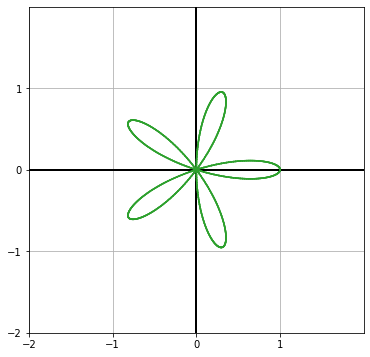

In [29]:
polar_coords = [(cos(x * pi / 100.0), 2 * pi * x / 1000.0) for x in range(0, 1000)]
vectors = [to_cartesian(p) for p in polar_coords]
draw(Polygon(*vectors, color=green))

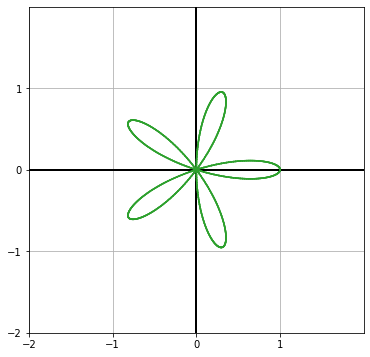

In [31]:
polar_coords = [(cos(5 * x * pi / 500.0), 2 * pi * x / 1000.0) for x in range(0, 1000)]
vectors = [to_cartesian(p) for p in polar_coords]
draw(Polygon(*vectors, color=green))

**Ex-2.38**: Find the angle to get to the point (–2, 3) by “guess-and-check.”

Hint We can tell visually that the answer is between /2 and . On that interval, the values of sine and cosine always decrease as the angle increases.

Here’s an example of guessing and checking between /2 and ,
looking for an angle with tangent close to –3/2 = –1.5:

In [33]:
from math import tan, pi

pi, pi / 2

(3.141592653589793, 1.5707963267948966)

In [34]:
tan(1.8)

-4.286261674628062

In [35]:
tan(2.5)

-0.7470222972386603

**Ex-2.39**: Find another point in the plane with the same tangent as $\theta$ ,
namely –3/2. Use Python’s implementation of the arctangent function,
math.atan, to find the value of this angle.

In [36]:
from math import atan

atan(-3 / 2)

-0.982793723247329